# Import

In [2]:

import numpy as np
from scipy.special import comb
import random as rd
import matplotlib.pyplot as plt

import networkx as nx

# Example: small circulation graph

In [24]:
nb_colonies = 5
migration_rate = 0.05
M = 40

s = 0.1
tmax = 10000
N = 100



In [33]:



b = True
t = 1


i_nodes = np.zeros(nb_colonies, dtype=int) # list of the number of mutants in each node
i_nodes[0] = 1
# i_nodes[np.random.choice(nb_colonies)] = 1 # for a random starting mutant
N_nodes = N * np.ones(nb_colonies, dtype=int) # list of the population size in each node
M_nodes = M * np.ones(nb_colonies, dtype=int) # list of the update size in each node


# creating a directed graph
DG = nx.DiGraph()

DG.add_nodes_from(list(range(nb_colonies)))


#adding weighted edges
for node1 in DG.nodes:
    for node2 in DG.nodes:
        if node1==node2:
            weight = 1 - (nb_colonies-1)*migration_rate
        else:
            weight = migration_rate
        DG.add_weighted_edges_from([(node1, node2, weight)])


trajectories = np.zeros((tmax,nb_colonies))
trajectories[0,:] = i_nodes

while t<tmax and b :
    #choose randomly one node
    selected_node = rd.randint(0, nb_colonies-1)

    #perform hypergeometrical sampling
    ngood = i_nodes[selected_node]
    nbad = N_nodes[selected_node] - ngood
    nb_mutants_before_update = np.random.hypergeometric(ngood, nbad, M_nodes[selected_node])

    # perform binomial sampling 
    x_tilde = sum([DG.edges[node, selected_node]['weight']*i_nodes[node]/N_nodes[node]  for node in list(DG.successors(selected_node))])
    prob = x_tilde * (1+s) / (1 + x_tilde*s)
    n_trials = M_nodes[selected_node]
    nb_mutants_after_update = np.random.binomial(n_trials, prob)

    # update nb of mutants in the node
    i_nodes[selected_node] = ngood - nb_mutants_before_update + nb_mutants_after_update

    trajectories[t,:] = i_nodes

    t += 1
    b = sum(i_nodes) < sum(N_nodes) and (i_nodes > 0).any()

if t<tmax:
    fixation = sum(i_nodes) == sum(N_nodes)
        
    for tt in range(t,tmax):
        trajectories[tt,:] = trajectories[t-1,:]


In [ ]:
def simulate_clique(N, M, nb_colonies, migration_rate, s, tmax):
    
    b = True
    t = 1


    i_nodes = np.zeros(nb_colonies, dtype=int) # list of the number of mutants in each node
    i_nodes[0] = 1
    # i_nodes[np.random.choice(nb_colonies)] = 1 # for a random starting mutant
    N_nodes = N * np.ones(nb_colonies, dtype=int) # list of the population size in each node
    M_nodes = M * np.ones(nb_colonies, dtype=int) # list of the update size in each node


    # creating a directed graph
    DG = nx.DiGraph()
    DG.add_nodes_from(list(range(nb_colonies)))


    #adding weighted edges
    for node1 in DG.nodes:
        for node2 in DG.nodes:
            if node1==node2:
                weight = 1 - (nb_colonies-1)*migration_rate/nb_colonies
            else:
                weight = migration_rate/nb_colonies
            DG.add_weighted_edges_from([(node1, node2, weight)])


    trajectories = np.zeros((tmax,nb_colonies))
    trajectories[0,:] = i_nodes

    while t<tmax and b :
        #choose randomly one node
        selected_node = rd.randint(0, nb_colonies-1)

        #perform hypergeometrical sampling
        ngood = i_nodes[selected_node]
        nbad = N_nodes[selected_node] - ngood
        nb_mutants_before_update = np.random.hypergeometric(ngood, nbad, M_nodes[selected_node])

        # perform binomial sampling 
        x_tilde = sum([DG.edges[node, selected_node]['weight']*i_nodes[node]/N_nodes[node]  for node in list(DG.successors(selected_node))])
        prob = x_tilde * (1+s) / (1 + x_tilde*s)
        n_trials = M_nodes[selected_node]
        nb_mutants_after_update = np.random.binomial(n_trials, prob)

        # update nb of mutants in the node
        i_nodes[selected_node] = ngood - nb_mutants_before_update + nb_mutants_after_update

        trajectories[t,:] = i_nodes

        t += 1
        b = sum(i_nodes) < sum(N_nodes) and (i_nodes > 0).any()

    fixation = sum(i_nodes) == sum(N_nodes)

    if t<tmax:
            
        for tt in range(t,tmax):
            trajectories[tt,:] = trajectories[t-1,:]

    return trajectories, fixation


In [43]:
N = 100
M = 50
nb_colonies = 5
migration_rate = 0.1
s = 0.2
tmax = 10000

trajectories, fixation = simulate_clique(N, M, nb_colonies, migration_rate,s,tmax)




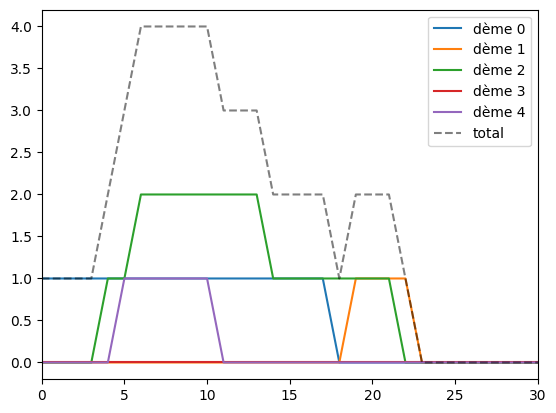

In [46]:
xx = list(range(tmax))
for k in range(nb_colonies):
    yy = trajectories[:,k]
    plt.plot(xx, yy, label = f"dème {k}")
tot_mutants = np.sum(trajectories, axis=1)
plt.plot(xx, tot_mutants, 'k--', alpha=0.5, label = "total")
plt.xlim([0, 30])
plt.legend()
plt.show()

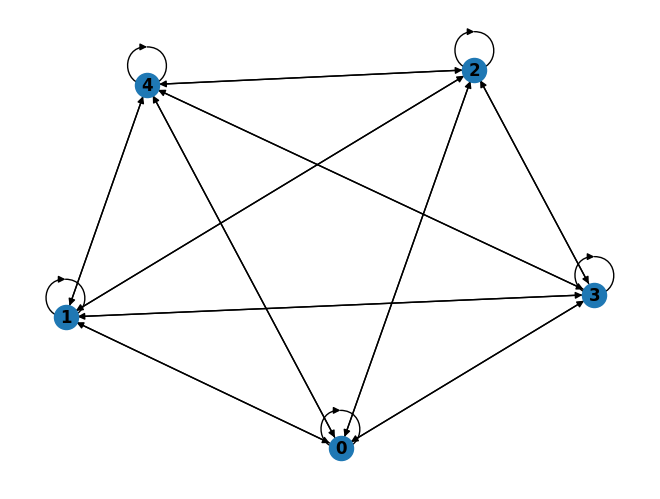

In [35]:
nx.draw(DG, with_labels=True, font_weight='bold')
